In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

In [2]:
plt.rcParams['figure.dpi'] = 720
plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('grayscale')

In [3]:
df = pd.read_csv('results/openml_benchmarks.csv').drop('Unnamed: 0', axis = 1)

In [4]:
df = df[df.cycle_id == 0]

In [5]:
df['winsRF'] = (df.perfRF > df.perfKNN) & (df.perfRF > df.perfBW)
df['winsKNN'] = (df.perfKNN > df.perfRF) & (df.perfKNN > df.perfBW)
df['winsBW'] = (df.perfBW > df.perfKNN) & (df.perfBW > df.perfRF)
df['winsortieRF'] = (df.perfRF >= df.perfKNN) & (df.perfRF >= df.perfBW)
df['winsortieKNN'] = (df.perfKNN >= df.perfRF) & (df.perfKNN >= df.perfBW)
df['winsortieBW'] = (df.perfBW >= df.perfKNN) & (df.perfBW >= df.perfRF)

In [6]:
df.head()

,cycle_id,task_id,len_data,len_features,perfRF,perfKNN,perfBW,timeRF,timeKNN,timeBW,winsRF,winsKNN,winsBW,winsortieRF,winsortieKNN,winsortieBW
0,0,3,3196,36,0.795995,0.367960,0.928661,3.264248,0.106481,129.632816,False,False,True,False,False,True
1,0,6,20000,16,0.965000,0.881400,0.916000,8.615105,1.295237,417.345507,True,False,False,True,False,False
2,0,11,625,4,0.815287,0.847134,0.917197,1.537972,0.014913,17.444645,False,False,True,False,False,True
3,0,12,2000,216,0.196000,0.180000,0.200000,4.236203,0.227577,598.951795,False,False,True,False,False,True
4,0,14,2000,76,0.182000,0.150000,0.186000,5.121942,0.100764,219.882666,False,False,True,False,False,True


In [7]:
print(df.perfRF.mean(), df.perfKNN.mean(), df.perfBW.mean(), df.timeRF.mean(), df.timeKNN.mean(), df.timeBW.mean())

0.7053568494532068 0.6413838084466211 0.7058061081448662 6.121211152965739 1.6462666058944444 821.450404320733


In [8]:
print(df.winsRF.mean(), df.winsKNN.mean(), df.winsBW.mean(), df.winsortieRF.mean(), df.winsortieKNN.mean(), df.winsortieBW.mean())

0.4745762711864407 0.0 0.3898305084745763 0.5932203389830508 0.05084745762711865 0.5254237288135594


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor = LinearRegression()
regressor.fit(df.timeBW.values.reshape(-1, 1), df.len_data)
df['pred_instances'] = regressor.predict(df.timeBW.values.reshape(-1, 1))
regressor.coef_, regressor.intercept_

(array([7.01265085]), 2967.963596772166)

In [11]:
regressor = LinearRegression()
regressor.fit(df.timeBW.values.reshape(-1, 1), df.len_features)
df['pred_features'] = regressor.predict(df.timeBW.values.reshape(-1, 1))
regressor.coef_, regressor.intercept_

(array([0.07205055]), 79.37337197442548)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


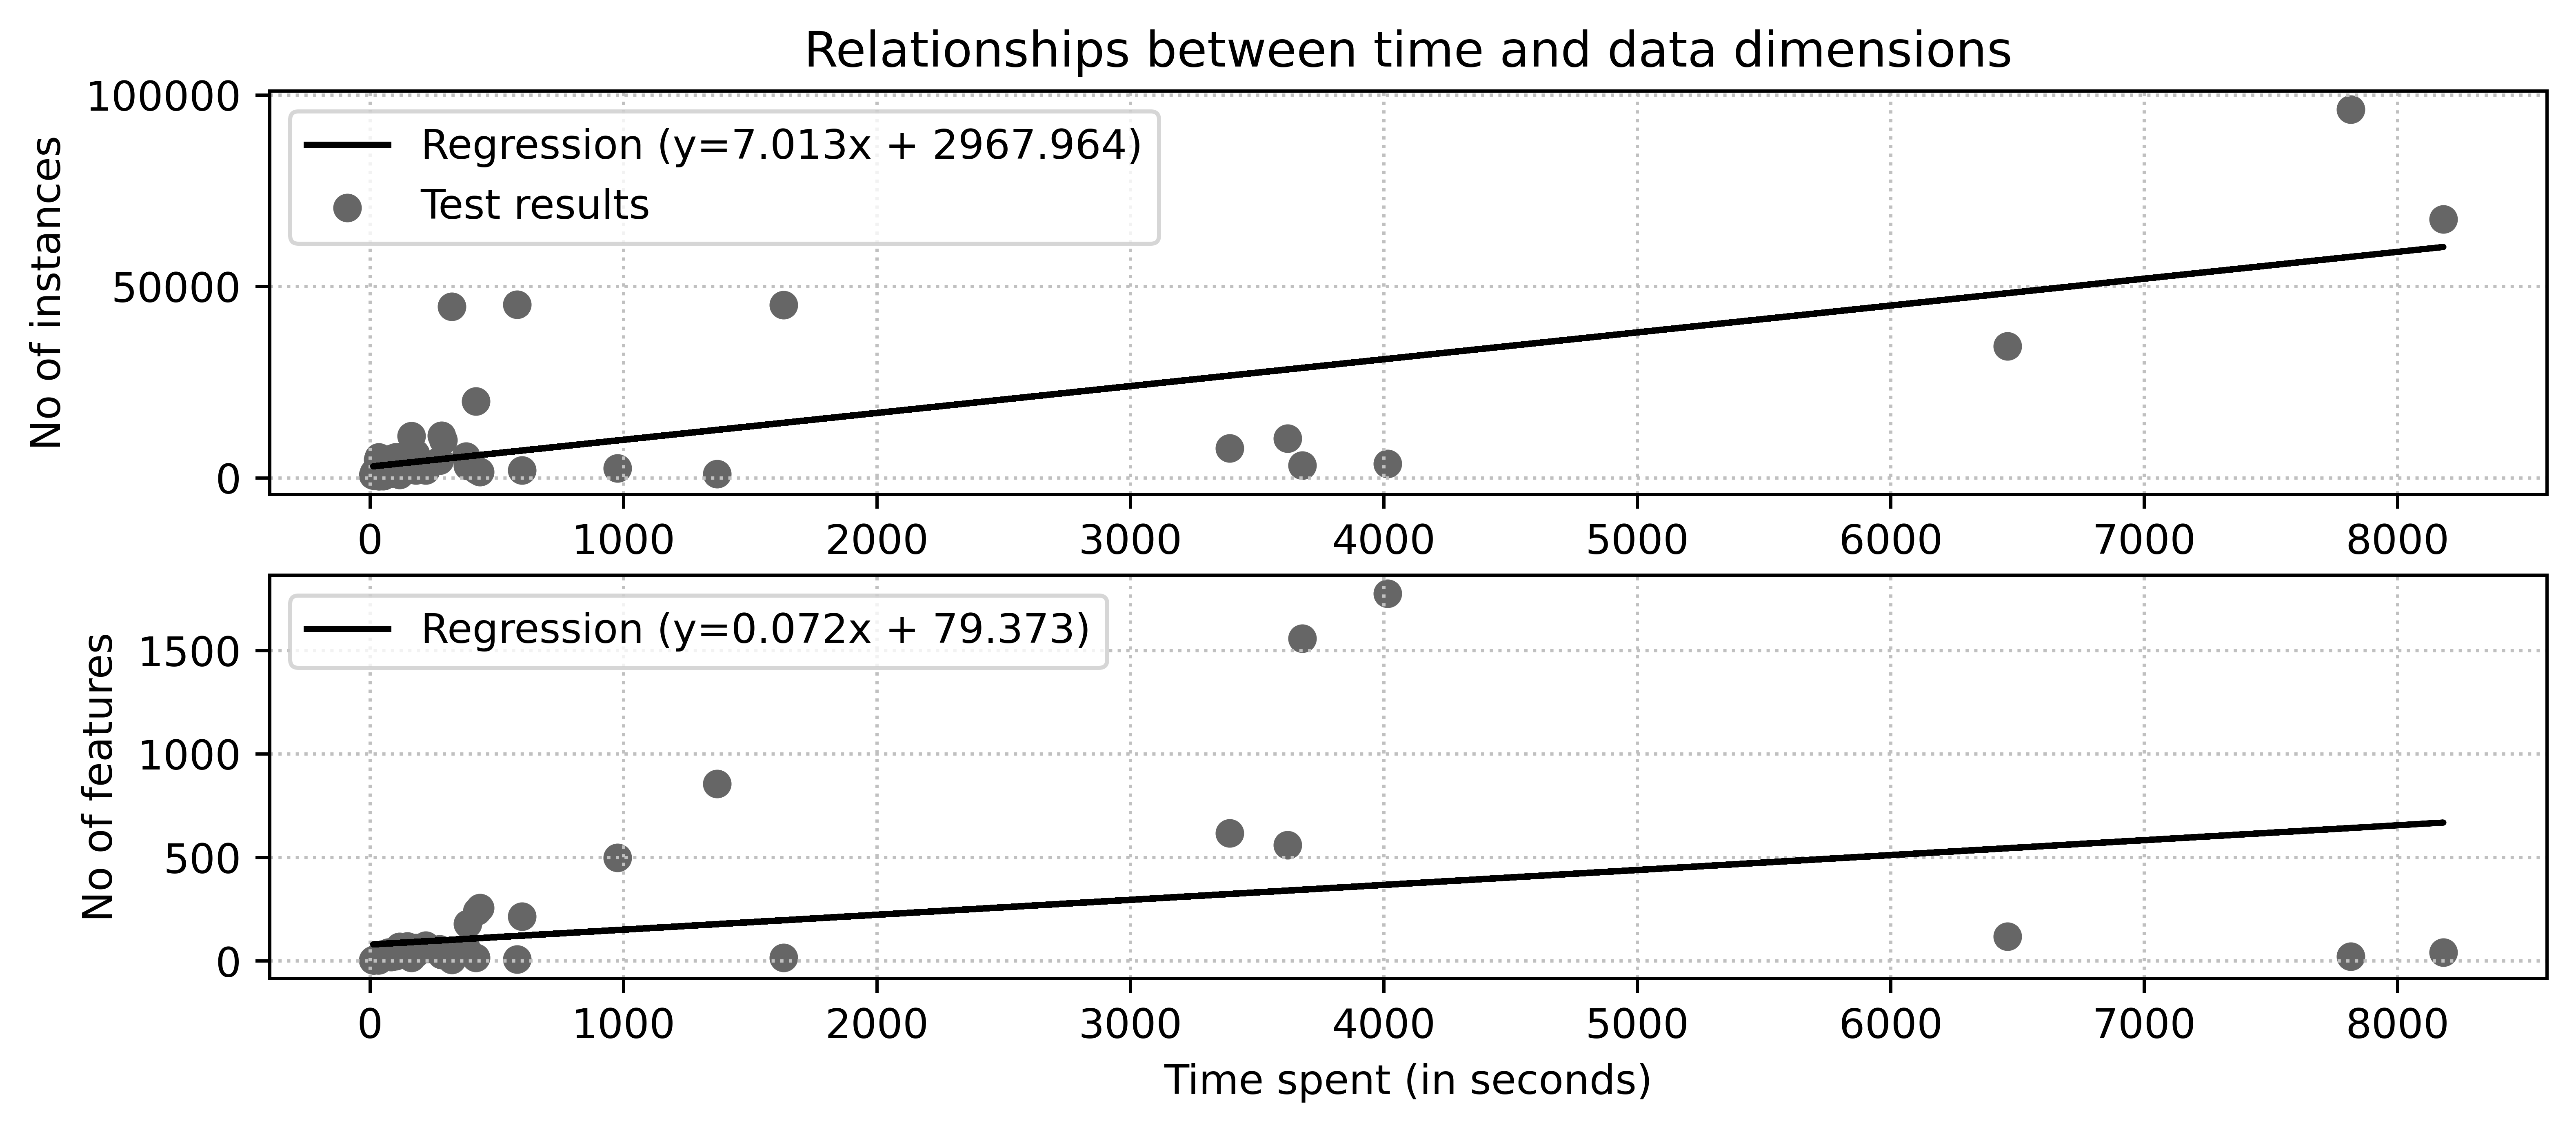

In [12]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.subplot(2,1,1)
plt.grid(linestyle=':', color = 'silver')
plt.title('Relationships between time and data dimensions')
plt.plot(df.timeBW, df.pred_instances, label = 'Regression (y=7.013x + 2967.964)')
plt.scatter(df.timeBW, df.len_data, color = 'C1', label = 'Test results')
plt.ylabel('No of instances')
plt.legend()

plt.subplot(2,1,2)
plt.grid(linestyle=':', color = 'silver')
plt.plot(df.timeBW, df.pred_features, label = 'Regression (y=0.072x + 79.373)')
plt.scatter(df.timeBW, df.len_features, color = 'C1')
plt.ylabel('No of features')
plt.xlabel('Time spent (in seconds)');
plt.legend(loc='upper left')

plt.savefig('figures/time_data_relationship.eps', format='eps');